In [19]:
from sklearn.datasets import make_blobs
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [61]:
blob_data = make_blobs(n_samples = 1000,
                 n_features = 2,
                 centers = 4,
                 return_centers = True,
                 random_state = 42)
x, y, c, centers = blob_data[0][:,0], blob_data[0][:,1], blob_data[1], blob_data[2]
data = np.stack([x,y], axis = 1)

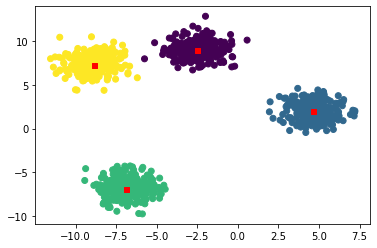

In [118]:
#Visualize Blobs
plt.scatter(x,y,c = c)
plt.scatter(centers[:,0],centers[:,1], s = 25, c = 'r', marker = 's')
plt.show()

In [87]:
def initialize_centers(data, num_clusters):
    num_samples = len(data)
    random_indices = np.random.randint(0, num_samples, num_clusters)
    centers = data[random_indices]
    return centers

In [96]:
def assignment(data, centers):
    c_dist = cdist(data, new_centers)
    new_assignments = np.argmin(c_dist, axis = 1)
    return new_assignments

In [116]:
def recalculate_centers(data, assignments, num_clusters):
    new_centers = np.zeros((num_clusters,2))
    for assignment in assignments:
        assignment_indices = assignments == assignment
        new_centroid = np.mean(data[assignment_indices], axis = 0)
        new_centers[assignment] = new_centroid
    return new_centers

In [117]:
initial_centers = initialize_centers(data, 4)
assignments = assignment(data, initial_centers)
new_centers = recalculate_centers(data, assignments, 4)

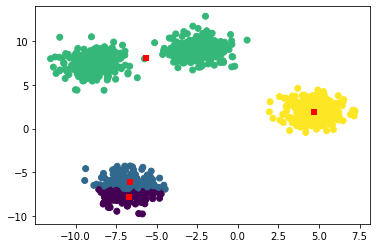

In [125]:
#Example of a poor initialization.

plt.scatter(x,y,c = assignments)
plt.scatter(new_centers[:,0],new_centers[:,1], s = 25, c = 'r', marker = 's')
plt.show()